<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/2c2024/ICDIC_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1: Análisis Exploratorio de Datos y Series Espacio-Temporales

**Objetivos:** Con este trabajo práctico se busca que los alumnos comiencen a familiarizarse con la limpieza, el análisis y la visualización de datos en Python. Además, se abordarán series temporales y espaciales con QGIS.

**Librerías:** En este trabajo se utilizará:

*   Numpy: matemática básica y definición de matrices y vectores
*   Pandas: manipulación y el análisis de datos
*   Seaborn/Matplotlib: construcción de gráficos

También necesitaremos de las librerías io y zipfile para acceder a los datos que serán analizados.

In [ ]:
# para el TP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# para lectura de archivos
from google.colab import files
import io
import zipfile

# para registrar el tiempo de corrida
import datetime

In [ ]:
!gdown --id 1gA40FsZM5-fqFPbP5azTzI7ACkK_CvW5
!unzip /content/Molinetes_2023.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gA40FsZM5-fqFPbP5azTzI7ACkK_CvW5
From (redirected): https://drive.google.com/uc?id=1gA40FsZM5-fqFPbP5azTzI7ACkK_CvW5&confirm=t&uuid=894c3730-4e7b-4e1d-9927-6914fece69ad
To: /content/Molinetes_2023.zip
100% 95.8M/95.8M [00:00<00:00, 106MB/s]
Archive:  /content/Molinetes_2023.zip
  inflating: Molinetes_2023.csv      


In [ ]:
start_datetime = datetime.datetime.now()

print('Inicio de corrida: ',start_datetime)

Inicio de corrida:  2024-09-12 17:44:09.836007


Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Análisis de datos: Galpones según su cerramiento

El primer ejercicio consiste en la visualización y exploración de datos, adentrándonos en lo que es la extracción de información de los mismos. Para ello utilizaremos un dataset de galpones metálicos diseñados siguiendo los reglamentos de EE.UU. y acorde a la práctica profesional habitual allí.

Estos datos fueron creados por Matthew D. Smith y Chia-Ming Uang. Pueden acceder al trabajo original a través del siguiente [link](https://escholarship.org/uc/item/4jt5p805), a partir del cual se generó el archivo `.csv` a utilizar por ustedes.

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
uploaded = files.upload()

Saving Galpones_v2.csv to Galpones_v2.csv


In [ ]:
#Se crea un DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Galpones_v2.csv']))
df.head()

,Frame,W_kip_,Height_in_,L_ft_,alpha,Cladding,Structure,Roof,Snow_psf,Seismic,Wind,Weights,k_lat_kip_ft_,MassParticipation,T_model_s_,T_r1_s_,T_r2_s_,T_S_U_s_
0,1,10.21,190.0,40,2.526,Metal Panels,Clear Span,Monoslope,0,Low,High,0.011666,3.520,0.933,0.546,0.546,0.545,0.707386
1,2,25.16,192.5,100,6.234,Metal Panels,Clear Span,Gabled,0,Low,High,0.032986,12.459,0.619,0.571,0.560,0.454,0.537498
2,3,46.71,220.0,160,8.727,Metal Panels,Clear Span,Monoslope,0,High,High,0.001667,27.663,0.423,0.606,0.580,0.415,0.423907
3,4,13.14,400.0,40,1.200,Metal Panels,Clear Span,Gabled,0,Low,High,0.002174,3.563,0.930,0.602,0.602,0.614,0.953937
4,5,52.23,385.0,100,3.117,Metal Panels,Clear Span,Monoslope,42,High,Low,0.001058,7.218,0.925,0.881,0.880,0.860,1.208260


Para facilitar el estudio del dataset, les presentamos las descripciones de cada una de las columnas:

* **Frame**: Número de pórtico en Dataset
* **W_kip_**: Peso de la estructura en $kip$
* **Height_in_**: Altura media del pórtico en $inches$
* **L_ft_**: Longitud total del pórtico en $feet$
* **alpha**: Relación de aspecto "Luz libre/Altura"
* **Cladding**: Característica del cerramiento (Chapa u hormigón)
* **Structure**: Tipología estructural (Clear Span/sin columnas intermedias o Modular/con columnas intermedias)
* **Roof**: Tipo de techo (Monoslope/1 pendiente o Gabled/a dos aguas)
* **Snow_psf**: Carga de nieve en $psf$ (pounds per square foot)
* **Seismic**: Clasificación de la zonificación sísmica (Low-High)
* **Wind**: Clasificación del viento de diseño (Low-High)
* **Weights**: Factor de ponderación para el análisis
* **k_lat_kip_ft_**: Rigidez lateral del pórtico en $kip/ft$
* **MassParticipation**: Participación en masa del primer modo de vibración
* **T_model_s_**: Período natural de la estructura en segundos
* **T_r1_s_**: Cálculo simplificado del período (método detallado)
* **T_r2_s_**: Cálculo simplificado del período (método sencillo)
* **T_S_U_s_**: Estimación del período según una fórmula empírica


Como background, este dataset fue creado con el objetivo de encontrar una ecuación empírica para estimar el período natural de un galpón sin necesidad de hacer un análisis dinámico. Como comentario, la ecuación a la que se llegó a partir de una regresión lineal ponderada es la siguiente, válida en principio para todos los galpones:

$$T_{a} = \left\{ \begin{array}{lrl} 0.058\left( W h\right)^{0.3} & \alpha \leq 3 &\\ 1.58W^{0.16}/ \alpha & \alpha > 3 &. \end{array} \right.$$

Más allá de eso, los datos se prestan para mucho más: en este ejercicio vamos a tratar de sacarle más jugo al mismo.

Como arranque, les damos una información propia del área de estudio que nos da una primera pista para nuestra investigación.

**Los galpones con pared de chapa no se diseñan igual que los que tienen paredes de hormigón**. Sin entrar en detalles, se usan distintos criterios de diseño (se limitan desplazamientos cuando las paredes son de hormigón, no así si son de chapa).

Por lo tanto, sería interesante ver cómo repercute eso y ver qué diferencias generan. Tal vez luego se pueda usar esa información para clasificar galpones, o para mejorar las predicciones de período.

### Influencia de variables categóricas

Lo primero que vamos a analizar es si las distintas clasificaciones del galpón (tipo de techo, tipo de estructura, clasificación de la zona sísmica y de viento) tienen influencia en los períodos naturales, y si esa diferencia es igual entre los que tienen paredes de chapa y hormigón.

***NOTA:*** *todo lo que vamos a ver en este ejercicio es de índole causal y se puede explicar mediante modelos físicos. Para el TP, nos interesa enforcarnos simplemente en las relaciones empíricas*

#### Actividad 1

**Actividad**: Construya un simple boxplot con los períodos de los galpones según sean con cerramiento de hormigón u acero.

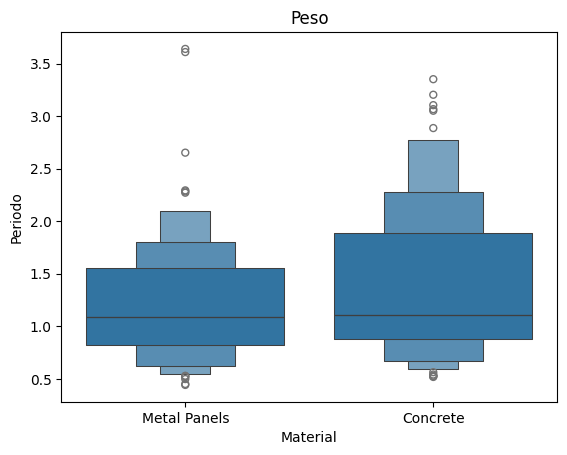

In [ ]:
################################################################################
# CODIGO DEL ALUMNO

################################################################################

plt.show()

#### Actividad 2

**Actividad**: Visto así, ¿parece haber una diferencia concreta según el tipo de cerramiento?

**Su respuesta**:

#### Actividad 3

A continuación se presentan una serie de boxplots donde ya no solo miro el período para la categoría `Cladding` suelta, sino que también miro su interacción con otras variables de interés (`Sismo`, `Viento`, `Techo` y `Estructura`)

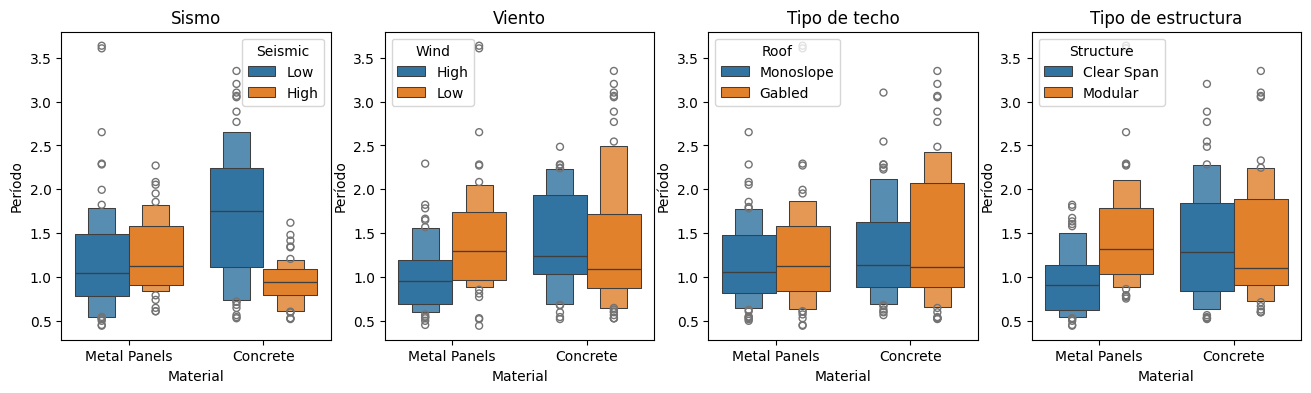

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Seismic', ax=axes[0]
              ).set(title='Sismo', xlabel='Material', ylabel='Período')

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Wind', ax=axes[1]
              ).set(title='Viento', xlabel='Material', ylabel='Período')

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Roof', ax=axes[2]
              ).set(title='Tipo de techo', xlabel='Material', ylabel='Período')

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Structure', ax=axes[3]
              ).set(title='Tipo de estructura', xlabel='Material', ylabel='Período')

plt.show()

**Actividad**: Con esta nueva información, ¿parece haber una diferencia concreta según el tipo de cerramiento? ¿Cuándo?

Si su respuesta cambio respecto a la actividad anterior, explique por qué y comente qué aprendizaje saca a la hora de explorar datos multivariados.

**Su respuesta**:

#### Actividad 4

Recordemos que el período natural de una estructura es

$$T=2\pi\sqrt{\frac{W}{gK}}$$

Es decir, es una función del peso (la masa). ¿Este nuevo dato cambiará las conclusiones anteriores?

**Actividad**: Realice un análisis similar al anterior para ver cómo el *peso* del galpón cambia según la tipología estructural (modular o clear span) y el tipo de cerramiento (chapa u hormigón).

¿En base a estos nuevos datos, cambiaría su hipótesis sobre qué variables afectan al período? Es decir, ¿hay un efecto que se veía anteriormente que puede ser justificado por otra cosa y no necesariamente su clasificación en sí misma?

**NOTA:** Son 2 gráficos, nosotros ya les damos los subplots definidos y el gráfico de la izquierda (es el mismo de la actividad 3), ustedes tienen que construir su gráfico en el `axes[i]` correspondiente para que quede a la derecha.

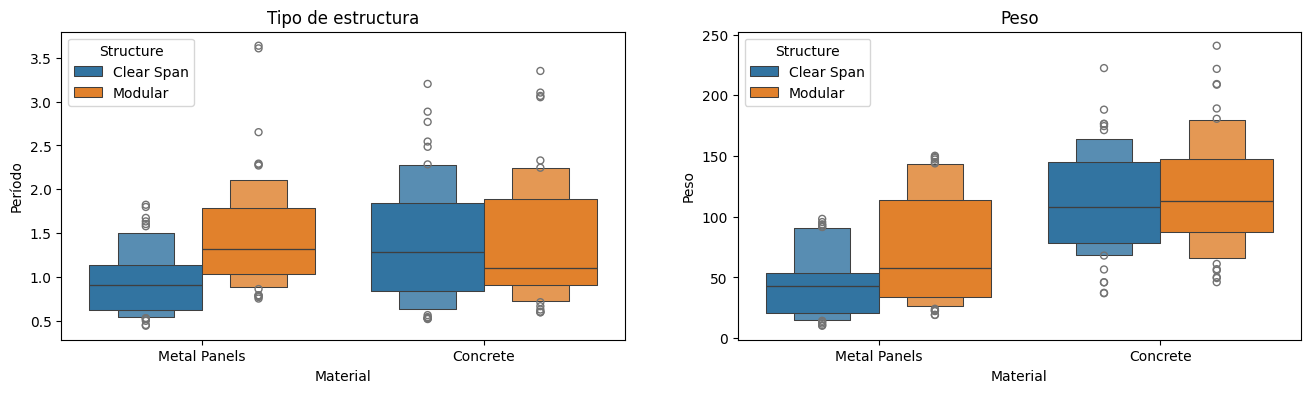

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Structure', ax=axes[0]
              ).set(title='Tipo de estructura', xlabel='Material', ylabel='Período')
################################################################################
# CODIGO DEL ALUMNO

################################################################################

plt.show()

#### Actividad 5

**Actividad**: Conociendo más sobre su proceso físico y con la nueva visualización de datos, ¿Cambia sus conclusiones respecto a la importancia del tipo de estructura? Explique por qué.

**Su respuesta**:

### Influencia de variables continuas

Siguiendo con lo anterior, nos interesa ver si el período puede ser explicado no sólo a partír de lo visto arriba, sino también con variables continuas.


#### Actividad 6

El primer paso será ver en forma rápida todas las variables continuas de interés para explicar el período.

**Actividad**: Construya un pair-plot que incluya:
- Altura
- Longitud
- Peso
- Relacion de lados
- Periodo

Hágalo distinguiendo con colores según el tipo de cerramiento.

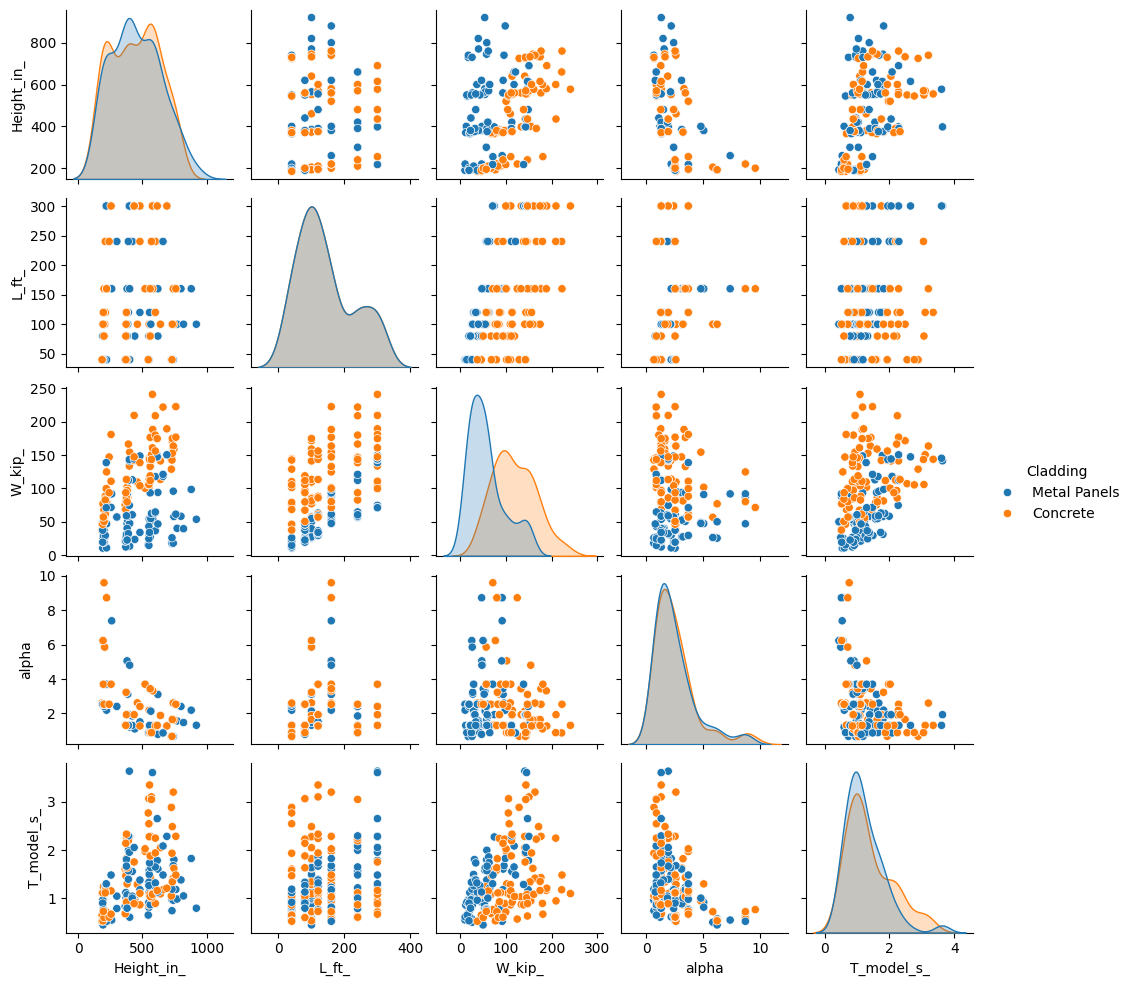

In [ ]:
# Pair plot
################################################################################
# CODIGO DEL ALUMNO

################################################################################
plt.show()

#### Actividad 7

Para ayudar con la lectura del gráfico, veamos las correlaciones entre las variables.

Primero, nosotros le mostramos la construcción de un heatmap para todos los galpones:

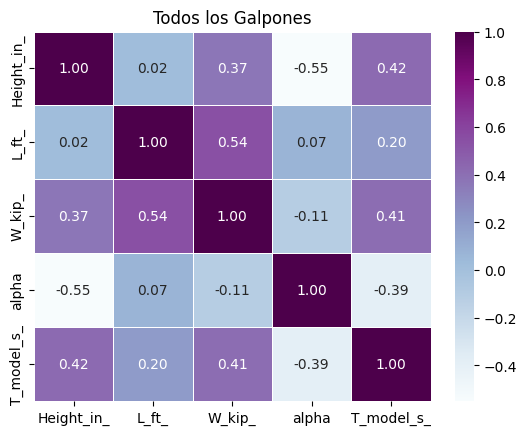

In [ ]:
df_corr = df[[ 'Height_in_', 'L_ft_', 'W_kip_', 'alpha', 'T_model_s_']].corr().round(2)
sns.heatmap(df_corr, cmap='BuPu', fmt='.2f', annot=True, linewidths=.6).set(title='Todos los Galpones')
plt.show()

**Actividad**: Repita el proceso construyendo 2 heatmaps, uno por cada tipo de cerramiento en la subfigura inicializada. Tendrá que construir dos dataframes auxiliares de nombre `df_MP_corr` y `df_C_corr`.

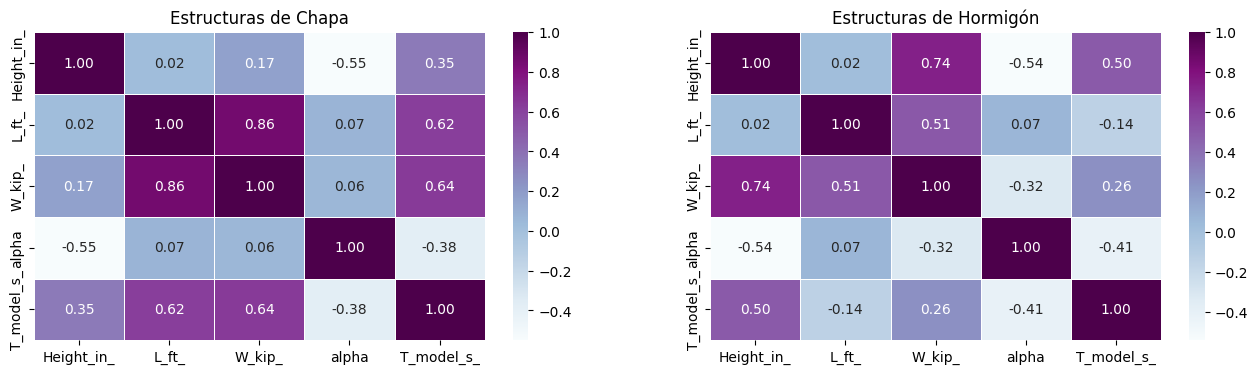

In [ ]:
################################################################################
# CODIGO DEL ALUMNO
df_MP_corr =
df_C_corr =
################################################################################

fig, axes = plt.subplots(1, 2, figsize=(16,4))
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

#### Actividad 8

Combinando los gráficos de la actividades anteriores, conteste las siguientes preguntas

1. ¿Son las mismas las variables correlacinadas (tomemos $|R|>0.5$) con el período natural en estructuras de chapa y estructuras de hormigón?
2. ¿Qué variables explicativas están altamente correlacionadas entre sí
(tomemos $|R|>0.7$) para cada tipología de cerramiento? ¿Tiene sentido usar las dos variables para explicar el período?
3. Si se animan, propongan una razón (nota: las paredes son de chapa u hormigón, el techo es siempre de chapa).
4. ¿Hay algún par de variables donde el valor de $R$ puede no estar contando toda la historia? ¿Por qué?
5. ¿Que la correlación sea baja con el período necesariamente significa que una variable no influye?

**Sus respuestas**:

### Combinando

Del estudio anterior fuimos detectando variables que parecían tener importancia en la determinación del período natural, tanto categóricas como continuas. Ahora vamos a tratar de meter un poco más detalle para que, futuro, se puedan proponer modelos que puedan predecir el período.

En ese sentido, queremos combinar la influencia de la altura y el peso, con la influencia de la zona sísmica y el tipo de cerramiento.

#### Actividad 9

**Actividad**: Construya gráficos a elección (les proponemos 6) que muestren las relaciones período-altura-peso, uno para cada tipo de cerramiento. En cada gráfico, separe de alguna forma identificable según la zonificación sísmica.

NOTA: con la función `lnplot` de seaborn pueden incluir en el gráfico la recta de cuadrados mínimos.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO








################################################################################

plt.show()

#### Actividad 10

**Actividad**: Con los gráficos anteriores, conteste:

1. ¿En qué casos la altura del edificio parece influir más y menos en el período? ¿El sismo? ¿El peso?
2. ¿Coincide su respuesta con lo que ha visto en actividades anteriores?

**Su respuesta**

### Precisión de estimación empírica

Por último, veamos si efectivamente la estimación empírica cumple con su objetivo de funcionar para todos los tipos de galpones y sitios de emplazamientos.

#### Actividad 11

**Actividad**: Construya una nueva columna en el Dataframe `ratio2` que sea el cociente entre el período estimado `T_S_U_s_` y el real `T_model_s`. Luego, construya dos box plots discriminando entre zonificación sísmica y viento de diseño para cada tipo de cerramiento.

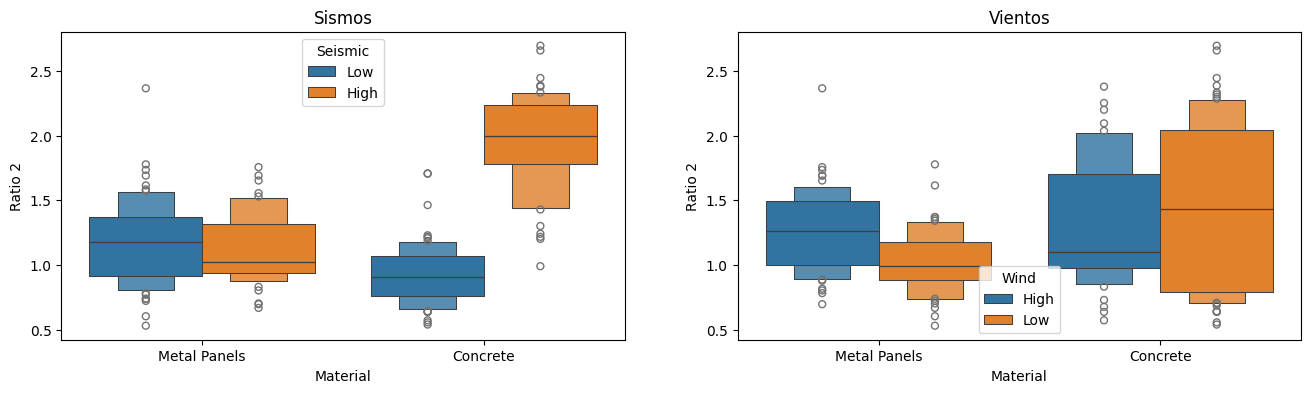

In [ ]:
# Cuando funciona el metodo simplifcado
################################################################################
# CODIGO DEL ALUMNO
df['ratio2'] =
################################################################################

fig, axes = plt.subplots(1, 2, figsize=(16,4))
################################################################################
# CODIGO DEL ALUMNO




################################################################################
plt.show()


#### Actividad 12

**Actividad**: Conteste las siguientes preguntas:
1. ¿Cuándo funciona la fórmula estimada? ¿Cuándo no? Identifique el caso más crítico.
2. En base a lo que venimos analizando, ¿por qué ocurre y qué recomendaría hacer para mejorarlo? Considere que si el boxplot está aproximadamente entre 0.75 y 1.25 que los resultados son aceptables ingenierilmente (idealmente estaría centrado en 1, pero magia no hay)

**NOTA:** Antes de contestar recuerde que hay muchas variables en juego, tal vez mirar un gráfico sólo lleve a conlusiones erróneas. Preste atención a los dos en su conjunto. Por ejemplo, el efecto del viento en estructuras de hormigón era poco importante, así que lo que diga ese boxplot aporta poco (tiene mucho más/menos)

**NOTA2:** Recuerde la fórmula empírica:

$$T_{a} = \left\{ \begin{array}{lrl} 0.058\left( W h\right)^{0.3} & \alpha \leq 3 &\\ 1.58W^{0.16}/ \alpha & \alpha > 3 &. \end{array} \right.$$

**Sus respuestas**:

## Ejercicio 2: Análisis Exploratorio de datos y Series temporales: Subtes de Buenos Aires

Para realizar el segundo ejercicio, se debe cargar el Dataset con los datos de los molinetes de los subtes de Ciudad de Buenos Aires durante el año 2023.

In [ ]:
#Se crea un DataFrame
df = pd.read_csv("/content/Molinetes_2023.csv", sep=";")
df.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,1/1/2023,07:45:00,08:00:00,LineaB,LineaB_Alem_S_Turn04,Leandro N. Alem,0,0,2,2
1,1/1/2023,07:45:00,08:00:00,LineaA,LineaA_Acoyte_S_Turn01,Acoyte,0,0,2,2
2,1/1/2023,07:45:00,08:00:00,LineaB,LineaB_Lacroze_E_Turn06,Federico Lacroze,3,0,0,3
3,1/1/2023,07:45:00,08:00:00,LineaB,LineaB_Pasteur_S_Turn02,Pasteur,1,0,0,1
4,1/1/2023,07:45:00,08:00:00,LineaC,LineaC_Constitucion_Plaza_Turn04,Constitucion,1,0,0,1


### Actividad 1

**Actividad**: Limpie el dataset hasta llegar a algo trabajable. ¡Los iremos guiando a base de preguntas y objetivos!

Observe el DataFrame generado.
- ¿Qué columnas son necesarias conservar para analizar la cantidad de pasajeros en las diferentes estaciones de las líneas de subte de CABA, para distintos períodos de tiempo?
- ¿Considera que hay palabras o datos prescindibles en las columnas o entre columnas?

Conserve las columnas a utilizar y realice la limpieza necesaria de los datos conservados.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO




################################################################################
df.head()

- Utilizando `df.info()`, ¿Qué información obtiene? ¿Qué cambios podría realizar en los tipos de dato?

**AYUDA:** si se utiliza `pd.to_datetime()` en una columna con una fecha con un formato conocido, el tipo de dato se modifica correctamente y sin inconvenientes. Por otro lado, si se utiliza con una columna que posee una hora únicamente, el tiempo se identificará, pero completará con una fecha determinada por Python.

Para evitarlo, cree una columna que contenga la fecha, un espacio y la hora, y a esa nueva columna transfórmela con `pd.to_datetime()`.

In [ ]:
df.info()

In [ ]:
################################################################################
# CODIGO DEL ALUMNO





################################################################################
df.info()

- Construya nuevas columnas con el año, el mes, la semana, el día, el día de semana (en número y nombre del día) y la hora.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO








################################################################################
df.head()

Ahora que tenemos los datos limpios para lo que queremos hacer, avancemos:

### Actividad 2

¿Cuáles son las líneas más utilizadas en **pasajeros anuales**?

**Actividad**: Construya un nuevo dataframe que muestre esta información, llamado `df_total` y realice un gráfico de barras.


**AYUDA:** Se ha agregado un diccionario con los colores de las líneas de subte. Uno de los parámetros de `sns.barplot()` debe ser `hue='LINEA'` y `palette=colores` para que se apliquen.

In [ ]:
colores = {
    'A': '#00b2e0',
    'B': '#fc4c41',
    'C': '#0068b3',
    'D': '#198769',
    'E': '#8c1e92',
    'H': '#f3cb40'
}

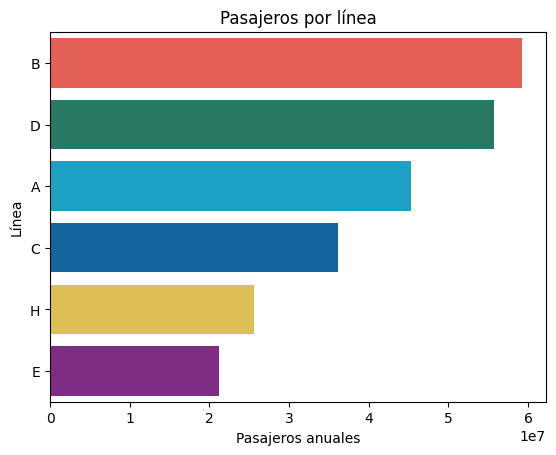

In [ ]:
# Creación del DataFrame: df_total
################################################################################
# CODIGO DEL ALUMNO

df_total =

################################################################################

# Gráfico:
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

### Actividad 3

¿Cuáles son las 10 estaciones más concurridas en **pasajeros anuales**?

**Actividad**: Construya un nuevo dataframe que muestre esta información, llamado `df_estacion` y realice un gráfico de barras.

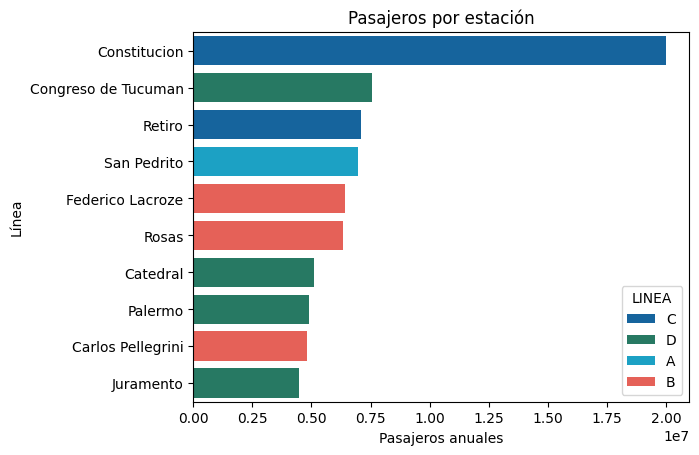

In [ ]:
# Creación del DataFrame: df_estacion
################################################################################
# CODIGO DEL ALUMNO

df_estacion =

################################################################################


# Gráfico:
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

### Actividad 4

¿Cuál o cuáles son las horas pico para cada línea en el subte de CABA en **pasajeros por hora**?

**Actividad**: Construya un nuevo dataframe que muestre esta información, llamado `df_hora` y realice un gráfico de línea.

**AYUDA**: Lo que necesita hacer es un dataframe que agrupe para sumar los intervalos de 15min dentro de una hora para cada línea y día. El mismo gráfico de Seaborn se encargará de indicar valor medio y desvío de los pasajeros por hora en función de la cantidad de datos (días) disponibles para ese intervalo de tiempo.

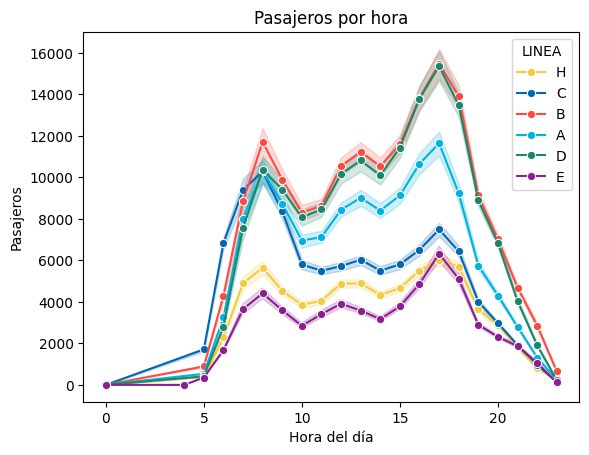

In [ ]:
# Creación del DataFrame: df_hora
################################################################################
# CODIGO DEL ALUMNO
df_hora =

################################################################################


# Gráfico:
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

### Actividad 5

**Actividad**: Realice un gráfico de línea donde se observe el número de **pasajeros por día** a lo largo del tiempo. Construya nuevos dataframes que muestre esta información para todo el año 2023, y para un mes en particular y realice los gráficos.


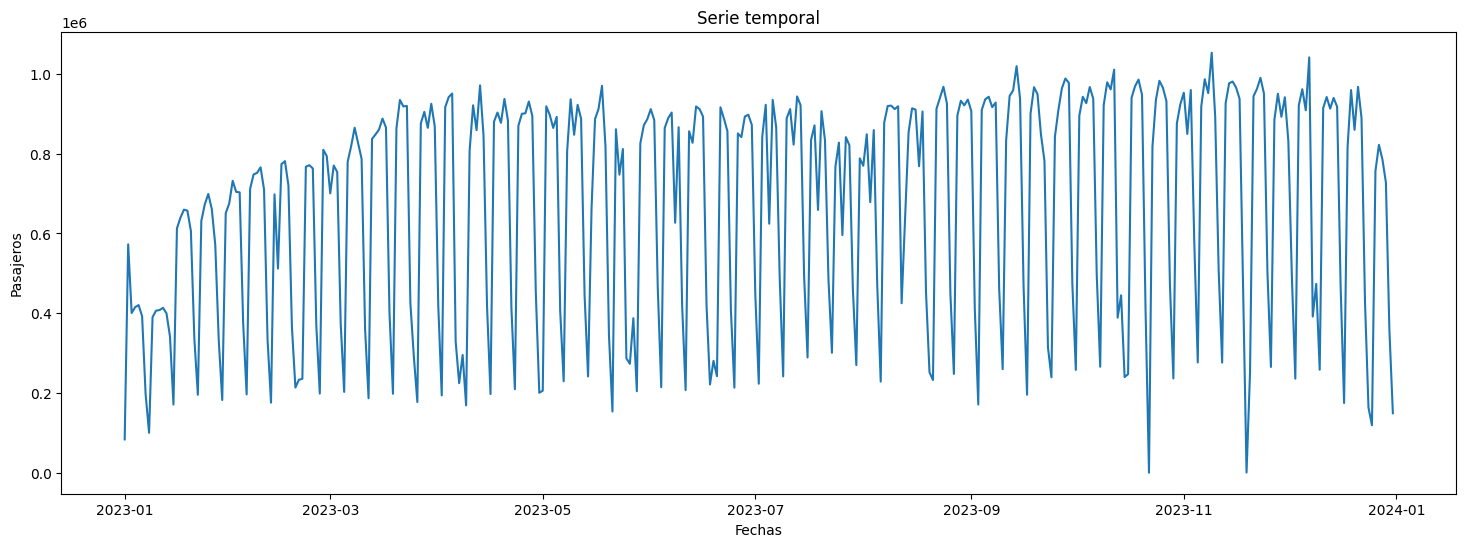

In [ ]:
# Gráfico: año 2023
################################################################################
# CODIGO DEL ALUMNO
df_diario =

################################################################################

################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

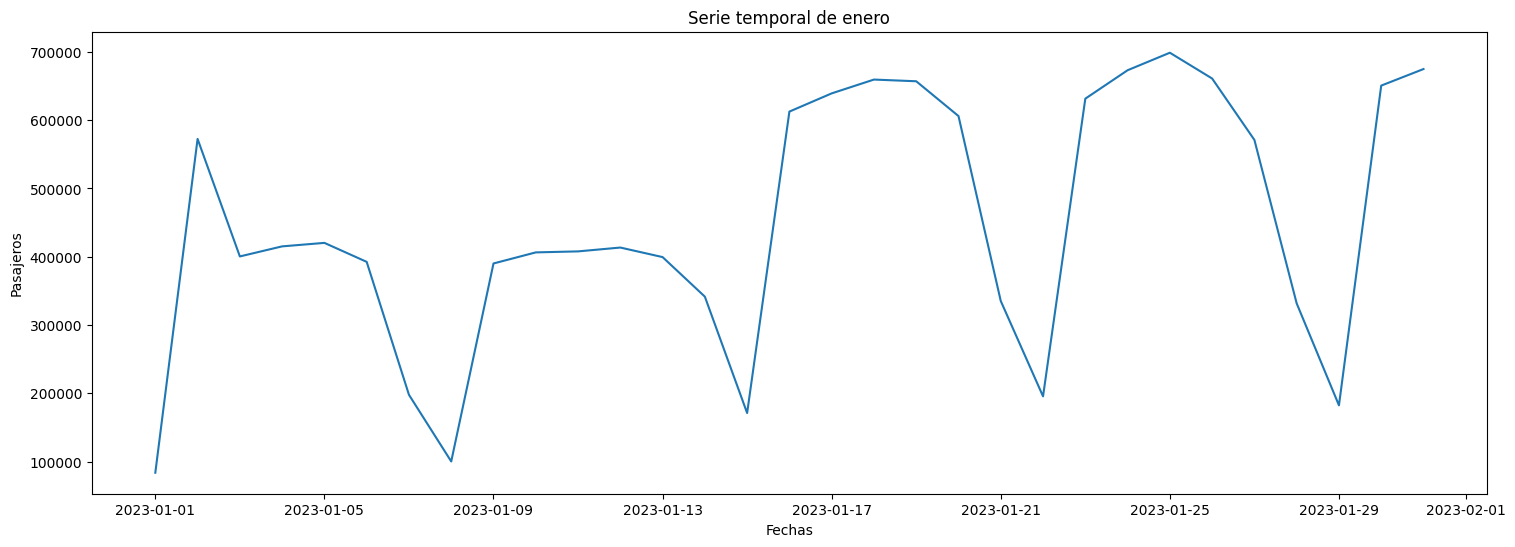

In [ ]:
# Gráfico: un mes particular
################################################################################
# CODIGO DEL ALUMNO
df_diario_enero =

################################################################################

# Gráfico
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

### Actividad 6

**Actividad**: Suavice la curva anterior, calculando la media móvil con una ventana de 30 días. Grafique ambas curvas en la misma figura para comparar.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO

# Media móvil con ventana de 30 días
df_30d =

# Gráficos





################################################################################
plt.show()

### Actividad 7

**Actividad**: Realice un gráfico de caja por cada día de la semana de **pasajeros diarios** ¿Observa alguna tendencia o estacionalidad?

In [ ]:
################################################################################
# CODIGO DEL ALUMNO





################################################################################
plt.show()

### Actividad 8

**Actividad**: ¿Observa alguna estacionalidad en los puntos anteriores? Explique.

**Su respuesta**:

## Ejercicio 3: Datos espaciales con Sistemas de Información Geográfica

Este ejercicio va a ser su introducción a la utilización de GIS, en particular QGIS (ya que es libre). A futuro esto les servirá para tener una base en la vida profesional. El objetivo es hacer uso de GIS crear datasets ampliados, explorando distintas fuentes de datos y aplicando herramientas de análisis espacial. En este caso, trabajaremos con una variedad de datos geoespaciales que brindan información clave sobre la infraestructura, demografía y el entorno geográfico de la región. Estos datos pueden ser de gran utilidad en el ámbito de la ingeniería civil para planificar proyectos, evaluar riesgos y diseñar soluciones orientadas a mejorar la calidad de vida en las ciudades y áreas rurales.

Los datos están disponibles dentro de un proyecto de QGIS descargable desde el siguiente [enlace](https://drive.google.com/file/d/1Y5953cmKuHsQtl5uPH5svfusjCTq2D2K/view?usp=drive_link). Este contiene:

- **Datos del Censo 2010**: Información esencial sobre las condiciones socioeconómicas y de infraestructura de las viviendas. Estos datos permiten realizar estudios de desigualdad social, planificación urbana, calidad de la infraestructura de servicios (agua, cloacas, gas) y necesidades básicas insatisfechas, ayudando a identificar áreas prioritarias para intervenciones en obra pública.
- **Departamentos (Partidos y Comunas)**: Representan la división político-administrativa de la Argentina.
- **Subcuencas**: La clasificación de subcuencas permite estudiar la dinámica hidrológica de la región, relevante para el manejo de recursos hídricos y la gestión de riesgos de inundación.
- **Recurrencia de Inundación**: Los datos de recurrencia de inundaciones, basados en modelaciones hidrológicas, son esenciales para el diseño de infraestructuras, la planificación urbana en zonas vulnerables y la prevención de desastres en áreas propensas a inundaciones.
- **Centros de Salud y Establecimientos Educativos**: La ubicación de infraestructuras críticas como hospitales y escuelas es fundamental para evaluar el acceso a servicios y planificar el desarrollo de infraestructura de transporte y nuevas instalaciones en áreas urbanas en crecimiento.
- **Paradas de Colectivo y Trenes**: Estos datos permiten analizar la accesibilidad y conectividad del transporte público, clave en el diseño de proyectos de movilidad urbana, transporte sostenible y la mejora de la infraestructura vial.

### Generación y extracción de nuevas variables con GIS

#### Actividad 1

**Actividad**: Utilizando los datos proporcionados (y otros que quieran agregar), genere al menos dos nuevas variables aplicando las herramientas de GIS. *Una de esas variables debe ser el departamento al que pertenece el radio censal*.

Ejemplos de nuevas variables adicionales que pueden incluir:
- Distancia del centroide de la zona a servicios como hospital o colegio más cercano.
- Número de paradas de transporte público en la zona, o densidad.
- Proporción de personas con necesidades básicas insatisfechas, área del radio censal.
- Extracción de valores de capas raster o vectorial: departamento al que pertenece el radio censal o si se encuentra en una zona inundable.

#### Actividad 2

**Actividad**: Exporte los datos resultantes, incluyendo las nuevas variables generadas, para su análisis en Python. Muestre el dataset generado (por lo menos 5 filas) y describa brevemente cada una.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO






################################################################################

**Su respuesta**:

### Análisis del dataset en Python


#### Actividad 3

**Actividad**: Realice un análisis exploratorio de las variables generadas y existentes. El análisis debe incluir al menos:
- Un histograma para visualizar la distribución de datos de una de las variables.
- Un boxplot para analizar la dispersión y posibles valores atípicos de datos en otra variable.
- Un análisis de correlación y/o interacción entre dos o más variables relevantes.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO






################################################################################

In [ ]:
################################################################################
# CODIGO DEL ALUMNO






################################################################################

In [ ]:
################################################################################
# CODIGO DEL ALUMNO






################################################################################

#### Actividad 4

**Actividad**: Construya un mapa temático que visualice una de las variables generadas o existentes, explicando de qué se trata.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO






################################################################################

**Su respuesta**:

#### Actividad 5

**Actividad**: Explique brevemente los gráficos generados en las actividades anteriores, describiendo los patrones observados y cualquier relación significativa entre las variables.

**Su respuesta**:

## Avance del TP Integrador

Al momento de la entrega del Trabajo Práctico 1, el grupo ya debiera haber recibido feedback de los docentes respecto a los potenciales datasets propuestos en el Trabajo Práctico 0, y emepezado en conjunto con ellos a evaluar su idoneidad para definir en forma concreta la pregunta a contestar a partir de los datos. Parte de este proceso incluye caracterizarlos (explorarlos).

**Actividad**: Confirmar la pregunta a resolver y el dataset (o datasets) a utilizar para tal fin, en función de lo discutido con los docentes, y realizar un Análisis Exploratorio de Datos.

Pueden pensar en las siguientes preguntas para su entrega:

- ¿Cuál es el área de aplicación dónde se enmarca el trabajo?
- ¿Cuál es la pregunta (o preguntas) de interés que busca responder el trabajo?
- ¿Cuál es el contexto práctico en dónde se enmarca la pregunta de interés?
- ¿Qué relevancia tiene responder la pregunta de interés?

Incluir a su vez, información acerca del dataset:

- ¿Qué características tiene el dataset a utilizar?
¿Por qué variables está compuesto: de qué tipo y significado?
- ¿Cómo fueron obtenidos los datos?
- ¿De qué tipo de experimento salieron?

Por último, muestren gráficos exploratorios de su variable de interés y potenciales variables explicativas (de haberlas) luego del proceso de filtrado y limpieza necesario. Háganlo con la intención de poder contestar las siguientes preguntas:

- ¿Cómo se realizó la limpieza del dataset?
- ¿Qué razonamiento se utilizó para limpiar y emprolijar el dataset?
- ¿Qué relación esperable o potencial hay entre las variables del dataset y la pregunta de interés?

Saque algunas conclusiones o información que pueda servir para futuras entregas.

**Su respuesta**:

# Entrega del Trabajo Práctico

Para la entrega del TP1, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Disconnect and delete runtime`,`run all`)
2. Revise que todos los resultados estén presentes y como ustedes esperaban.
3. Asegúrese haber contestado todas la preguntas que requieren prosa.
4. Descargue el arcihvo .ipynb en su computadora
5. Incluya en la entrega el archivo generado como dataset en QGIS (las nuevas capas que haya creado o editado).

Revise que está todo como les gusta y ¡ya está listo! Ustedes son responables de que la entrega refleje sus intenciones, más allá de que nosotros podamos correr su archivo para revisar.

Los datos presentados abajo intentan ser para ustedes (y para nosotros) una verificación de que efectivamente han hecho la revisión final.

In [ ]:
print('Inicio de corrida: ',start_datetime)

end_datetime = datetime.datetime.now()
print('Fin de corrida: ',end_datetime)

elapsed_time = end_datetime-start_datetime
print('Tiempo de ejecución: ',round(elapsed_time.total_seconds()/60,1),'minutos')

Inicio de corrida:  2024-09-12 17:44:09.836007
Fin de corrida:  2024-09-12 17:46:21.680907
Tiempo de ejecución:  2.2 minutos
